In [3]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 


In [4]:
df = pd.read_csv('Mobiles_Dataset.csv')



In [5]:
df

,Product Name,Actual price,Discount price,Stars,Rating,Reviews,RAM (GB),Storage (GB),Display Size (inch),Camera,Description,Link
0,"Apple iPhone 15 (Green, 128 GB)","₹79,600","₹65,999",4.6,"44,793 Ratings","2,402 Reviews",NIL,128,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,https://www.flipkart.com/apple-iphone-15-green...
1,"Apple iPhone 15 (Blue, 128 GB)","₹79,600","₹65,999",4.6,"44,793 Ratings","2,402 Reviews",NIL,128,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,https://www.flipkart.com/apple-iphone-15-blue-...
2,"Apple iPhone 15 (Black, 128 GB)","₹79,600","₹65,999",4.6,"44,793 Ratings","2,402 Reviews",NIL,128,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,https://www.flipkart.com/apple-iphone-15-black...
3,"OnePlus N20 SE (JADE WAVE, 128 GB)","₹19,999","₹11,489",4.0,"1,005 Ratings",41 Reviews,4,128,6.56,50MP,4 GB RAM | 128 GB ROM16.66 cm (6.56 inch) Disp...,https://www.flipkart.com/oneplus-n20-se-jade-w...
4,"OnePlus N20 SE (BLUE OASIS, 64 GB)","₹16,999","₹12,999",4.0,"1,005 Ratings",41 Reviews,4,64,6.56,50MP,4 GB RAM | 64 GB ROM16.66 cm (6.56 inch) Displ...,https://www.flipkart.com/oneplus-n20-se-blue-o...
...,...,...,...,...,...,...,...,...,...,...,...,...
979,Kechaoda A27,"₹1,499",₹967,4.0,"11,022 Ratings",693 Reviews,NIL,NIL,0.66,0MP | 0MP,32 MB RAM | 32 MB ROM | Expandable Upto 16 GB1...,https://www.flipkart.com/kechaoda-a27/p/itmfe3...
980,Kechaoda A27,"₹1,499",₹975,4.0,"11,022 Ratings",693 Reviews,NIL,NIL,0.66,NaN,32 MB RAM | 32 MB ROM | Expandable Upto 16 GB1...,https://www.flipkart.com/kechaoda-a27/p/itmfe3...
981,Kechaoda A27,"₹1,499",₹975,4.0,"11,022 Ratings",693 Reviews,NIL,NIL,0.66,NaN,32 MB RAM | 32 MB ROM | Expandable Upto 16 GB1...,https://www.flipkart.com/kechaoda-a27/p/itmfe3...
982,Kechaoda A27,"₹1,499",₹930,4.0,"11,022 Ratings",693 Reviews,NIL,NIL,0.66,0MP | 0MP,32 MB RAM | 32 MB ROM | Expandable Upto 16 GB1...,https://www.flipkart.com/kechaoda-a27/p/itmfe3...


In [6]:
df.head()

,Product Name,Actual price,Discount price,Stars,Rating,Reviews,RAM (GB),Storage (GB),Display Size (inch),Camera,Description,Link
0,"Apple iPhone 15 (Green, 128 GB)","₹79,600","₹65,999",4.6,"44,793 Ratings","2,402 Reviews",NIL,128,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,https://www.flipkart.com/apple-iphone-15-green...
1,"Apple iPhone 15 (Blue, 128 GB)","₹79,600","₹65,999",4.6,"44,793 Ratings","2,402 Reviews",NIL,128,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,https://www.flipkart.com/apple-iphone-15-blue-...
2,"Apple iPhone 15 (Black, 128 GB)","₹79,600","₹65,999",4.6,"44,793 Ratings","2,402 Reviews",NIL,128,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,https://www.flipkart.com/apple-iphone-15-black...
3,"OnePlus N20 SE (JADE WAVE, 128 GB)","₹19,999","₹11,489",4.0,"1,005 Ratings",41 Reviews,4,128,6.56,50MP,4 GB RAM | 128 GB ROM16.66 cm (6.56 inch) Disp...,https://www.flipkart.com/oneplus-n20-se-jade-w...
4,"OnePlus N20 SE (BLUE OASIS, 64 GB)","₹16,999","₹12,999",4.0,"1,005 Ratings",41 Reviews,4,64,6.56,50MP,4 GB RAM | 64 GB ROM16.66 cm (6.56 inch) Displ...,https://www.flipkart.com/oneplus-n20-se-blue-o...


In [7]:
df.tail()

,Product Name,Actual price,Discount price,Stars,Rating,Reviews,RAM (GB),Storage (GB),Display Size (inch),Camera,Description,Link
979,Kechaoda A27,"₹1,499",₹967,4.0,"11,022 Ratings",693 Reviews,NIL,NIL,0.66,0MP | 0MP,32 MB RAM | 32 MB ROM | Expandable Upto 16 GB1...,https://www.flipkart.com/kechaoda-a27/p/itmfe3...
980,Kechaoda A27,"₹1,499",₹975,4.0,"11,022 Ratings",693 Reviews,NIL,NIL,0.66,NaN,32 MB RAM | 32 MB ROM | Expandable Upto 16 GB1...,https://www.flipkart.com/kechaoda-a27/p/itmfe3...
981,Kechaoda A27,"₹1,499",₹975,4.0,"11,022 Ratings",693 Reviews,NIL,NIL,0.66,NaN,32 MB RAM | 32 MB ROM | Expandable Upto 16 GB1...,https://www.flipkart.com/kechaoda-a27/p/itmfe3...
982,Kechaoda A27,"₹1,499",₹930,4.0,"11,022 Ratings",693 Reviews,NIL,NIL,0.66,0MP | 0MP,32 MB RAM | 32 MB ROM | Expandable Upto 16 GB1...,https://www.flipkart.com/kechaoda-a27/p/itmfe3...
983,Kechaoda A27,"₹1,499",₹967,4.0,"11,022 Ratings",693 Reviews,NIL,NIL,0.66,0MP | 0MP,32 MB RAM | 32 MB ROM | Expandable Upto 16 GB1...,https://www.flipkart.com/kechaoda-a27/p/itmfe3...


In [13]:
df.describe()

,Stars,Display Size (inch)
count,984.000000,984.000000
mean,4.254980,6.043116
std,0.199734,1.581261
min,3.400000,0.660000
25%,4.200000,6.500000
50%,4.300000,6.670000
75%,4.400000,6.720000
max,5.000000,7.820000


In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product Name         984 non-null    object 
 1   Actual price         984 non-null    object 
 2   Discount price       984 non-null    object 
 3   Stars                984 non-null    float64
 4   Rating               984 non-null    object 
 5   Reviews              984 non-null    object 
 6   RAM (GB)             984 non-null    object 
 7   Storage (GB)         984 non-null    object 
 8   Display Size (inch)  984 non-null    float64
 9   Camera               908 non-null    object 
 10  Description          984 non-null    object 
 11  Link                 984 non-null    object 
dtypes: float64(2), object(10)
memory usage: 92.4+ KB


In [17]:
df.size

11808

In [19]:
df.shape

(984, 12)

In [21]:
df.columns

Index(['Product Name', 'Actual price', 'Discount price', 'Stars', 'Rating',
       'Reviews', 'RAM (GB)', 'Storage (GB)', 'Display Size (inch)', 'Camera',
       'Description', 'Link'],
      dtype='object')

In [23]:
df.ndim

2

In [25]:
df['Product Name'].unique()

array(['Apple iPhone 15 (Green, 128 GB)',
       'Apple iPhone 15 (Blue, 128 GB)',
       'Apple iPhone 15 (Black, 128 GB)',
       'OnePlus N20 SE (JADE WAVE, 128 GB)',
       'OnePlus N20 SE (BLUE OASIS, 64 GB)',
       'OnePlus 12R (Cool Blue, 128 GB)',
       'SAMSUNG Galaxy F14 5G (GOAT Green, 128 GB)',
       'CMF by Nothing Phone 1 (Blue, 128 GB)',
       'vivo Y200e 5G (Black Diamond, 128 GB)',
       'OPPO F25 Pro 5G (Ocean Blue, 128 GB)',
       'Motorola G85 5G (Urban Grey, 128 GB)',
       'Motorola g04s (Satin Blue, 64 GB)',
       'Motorola g64 5G (Ice Lilac, 256 GB)',
       'MOTOROLA G04 (Sunrise Orange, 64 GB)',
       'Nothing Phone (2a) 5G (Blue, 128 GB)',
       'Nothing Phone (2a) 5G (Blue, 256 GB)',
       'OnePlus 12 (Silky Black, 512 GB)',
       'itel it5027 6.1cm Screen,1200mAh Battery Wireless FM Radio with Recording,KingVoice',
       'realme 12 Pro+ 5G (Navigator Beige, 256 GB)', 'Nokia 105',
       'Infinix SMART 8 HD (Shiny Gold, 64 GB)',
       'Apple iP

In [27]:
df['Product Name'].value_counts()

Product Name
OPPO K12x 5G with 45W SUPERVOOC Charger In-The-Box (Breeze Blue, 256 GB)    31
Nokia 105 Single SIM, Keypad Mobile Phone with Wireless FM Radio             7
Kechaoda A27                                                                 6
itel it5330 | 2.8 inch Big Display | 1900 mAh Battery | Kingvoice            6
REDMI Note 13 Pro 5G (Coral Purple, 256 GB)                                  5
                                                                            ..
POCO F6 5G (Black, 512 GB)                                                   1
OPPO Reno8T 5G (Sunrise Gold, 128 GB)                                        1
OnePlus Nord CE4 lite 5G (SUPER SILVER, 256 GB)                              1
IQOO Z9X (Storm Grey, 128 GB)                                                1
Apple iPhone 15 (Green, 128 GB)                                              1
Name: count, Length: 657, dtype: int64

In [29]:
df['Product Name'].str.contains('Apple')


0       True
1       True
2       True
3      False
4      False
       ...  
979    False
980    False
981    False
982    False
983    False
Name: Product Name, Length: 984, dtype: bool

In [31]:
df['Product Name'].str.contains('OPPO')


0      False
1      False
2      False
3      False
4      False
       ...  
979    False
980    False
981    False
982    False
983    False
Name: Product Name, Length: 984, dtype: bool

In [33]:
df['Actual price'].unique()


array(['₹79,600', '₹19,999', '₹16,999', '₹39,999', '₹17,490', '₹21,999',
       '₹25,999', '₹23,999', '₹28,999', '₹20,999', '₹9,999', '₹27,999',
       '₹69,999', '₹1,499', '₹37,999', '₹35,999', '₹1,699', '₹7,999',
       '₹8,999', '₹89,600', '₹59,999', '₹7,299', '₹22,999', '₹1,649',
       '₹30,999', '₹34,999', '₹1,34,999', '₹26,999', '₹24,999', '₹33,999',
       '₹54,999', '₹17,990', '₹18,990', '₹6,799', '₹10,999', '₹1,399',
       '₹10,499', 'NIL', '₹32,999', '₹7,499', '₹1,599', '₹1,549',
       '₹89,999', '₹95,999', '₹17,999', '₹15,999', '₹11,999', '₹1,199',
       '₹2,999', '₹53,999', '₹46,999', '₹51,999', '₹14,999', '₹6,999',
       '₹18,999', '₹17,499', '₹20,499', '₹41,999', '₹1,999', '₹13,499',
       '₹79,999', '₹44,999', '₹47,999', '₹18,499', '₹1,899', '₹43,999',
       '₹13,999', '₹23,000', '₹1,09,600', '₹12,999', '₹84,999', '₹2,099',
       '₹2,599', '₹12,499', '₹64,999', '₹21,499', '₹1,240', '₹36,999',
       '₹40,999', '₹14,499', '₹69,600', '₹45,999', '₹15,499', '₹18,490'

# Data Cleaning 


In [36]:
df["Actual price"] = df["Actual price"].apply(lambda x : x.replace("₹",""))
df["Actual price"] = df["Actual price"].apply(lambda x : x.replace(",",""))

In [38]:
df["Actual price"] = df["Actual price"].apply(lambda x : x.replace("NIL",str(np.nan)))


In [40]:
df["Actual price"] = df["Actual price"].apply(lambda x : x.replace("nan","0"))


In [42]:
df.columns = [ "Product Name",	"Actual price",	"Discount price",	"Stars","Rating",	"Reviews"	,"RAM "	,"Storage "	,"Display Size (inch)"	,"Camera"	,"Description","Link"	]

In [44]:
df


,Product Name,Actual price,Discount price,Stars,Rating,Reviews,RAM,Storage,Display Size (inch),Camera,Description,Link
0,"Apple iPhone 15 (Green, 128 GB)",79600,"₹65,999",4.6,"44,793 Ratings","2,402 Reviews",NIL,128,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,https://www.flipkart.com/apple-iphone-15-green...
1,"Apple iPhone 15 (Blue, 128 GB)",79600,"₹65,999",4.6,"44,793 Ratings","2,402 Reviews",NIL,128,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,https://www.flipkart.com/apple-iphone-15-blue-...
2,"Apple iPhone 15 (Black, 128 GB)",79600,"₹65,999",4.6,"44,793 Ratings","2,402 Reviews",NIL,128,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,https://www.flipkart.com/apple-iphone-15-black...
3,"OnePlus N20 SE (JADE WAVE, 128 GB)",19999,"₹11,489",4.0,"1,005 Ratings",41 Reviews,4,128,6.56,50MP,4 GB RAM | 128 GB ROM16.66 cm (6.56 inch) Disp...,https://www.flipkart.com/oneplus-n20-se-jade-w...
4,"OnePlus N20 SE (BLUE OASIS, 64 GB)",16999,"₹12,999",4.0,"1,005 Ratings",41 Reviews,4,64,6.56,50MP,4 GB RAM | 64 GB ROM16.66 cm (6.56 inch) Displ...,https://www.flipkart.com/oneplus-n20-se-blue-o...
...,...,...,...,...,...,...,...,...,...,...,...,...
979,Kechaoda A27,1499,₹967,4.0,"11,022 Ratings",693 Reviews,NIL,NIL,0.66,0MP | 0MP,32 MB RAM | 32 MB ROM | Expandable Upto 16 GB1...,https://www.flipkart.com/kechaoda-a27/p/itmfe3...
980,Kechaoda A27,1499,₹975,4.0,"11,022 Ratings",693 Reviews,NIL,NIL,0.66,NaN,32 MB RAM | 32 MB ROM | Expandable Upto 16 GB1...,https://www.flipkart.com/kechaoda-a27/p/itmfe3...
981,Kechaoda A27,1499,₹975,4.0,"11,022 Ratings",693 Reviews,NIL,NIL,0.66,NaN,32 MB RAM | 32 MB ROM | Expandable Upto 16 GB1...,https://www.flipkart.com/kechaoda-a27/p/itmfe3...
982,Kechaoda A27,1499,₹930,4.0,"11,022 Ratings",693 Reviews,NIL,NIL,0.66,0MP | 0MP,32 MB RAM | 32 MB ROM | Expandable Upto 16 GB1...,https://www.flipkart.com/kechaoda-a27/p/itmfe3...


In [46]:
df.drop("Link",axis=1,inplace=True)
df

,Product Name,Actual price,Discount price,Stars,Rating,Reviews,RAM,Storage,Display Size (inch),Camera,Description
0,"Apple iPhone 15 (Green, 128 GB)",79600,"₹65,999",4.6,"44,793 Ratings","2,402 Reviews",NIL,128,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...
1,"Apple iPhone 15 (Blue, 128 GB)",79600,"₹65,999",4.6,"44,793 Ratings","2,402 Reviews",NIL,128,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...
2,"Apple iPhone 15 (Black, 128 GB)",79600,"₹65,999",4.6,"44,793 Ratings","2,402 Reviews",NIL,128,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...
3,"OnePlus N20 SE (JADE WAVE, 128 GB)",19999,"₹11,489",4.0,"1,005 Ratings",41 Reviews,4,128,6.56,50MP,4 GB RAM | 128 GB ROM16.66 cm (6.56 inch) Disp...
4,"OnePlus N20 SE (BLUE OASIS, 64 GB)",16999,"₹12,999",4.0,"1,005 Ratings",41 Reviews,4,64,6.56,50MP,4 GB RAM | 64 GB ROM16.66 cm (6.56 inch) Displ...
...,...,...,...,...,...,...,...,...,...,...,...
979,Kechaoda A27,1499,₹967,4.0,"11,022 Ratings",693 Reviews,NIL,NIL,0.66,0MP | 0MP,32 MB RAM | 32 MB ROM | Expandable Upto 16 GB1...
980,Kechaoda A27,1499,₹975,4.0,"11,022 Ratings",693 Reviews,NIL,NIL,0.66,NaN,32 MB RAM | 32 MB ROM | Expandable Upto 16 GB1...
981,Kechaoda A27,1499,₹975,4.0,"11,022 Ratings",693 Reviews,NIL,NIL,0.66,NaN,32 MB RAM | 32 MB ROM | Expandable Upto 16 GB1...
982,Kechaoda A27,1499,₹930,4.0,"11,022 Ratings",693 Reviews,NIL,NIL,0.66,0MP | 0MP,32 MB RAM | 32 MB ROM | Expandable Upto 16 GB1...


In [48]:
df["Discount price"] = df["Discount price"].apply(lambda x : x.replace("₹",""))
df["Discount price"] = df["Discount price"].apply(lambda x : x.replace(",",""))

In [50]:
df["Discount price"] = df["Discount price"].str.strip()
df["Discount price"] = df["Discount price"].apply(lambda x: float(x) if x.replace('.', '', 1).isdigit() else float('nan'))
df["Discount price"] = df["Discount price"].fillna(0)
df["Discount price"] = df["Discount price"].astype(float)


In [52]:
df["Actual price"] = df["Actual price"].apply(lambda x: str(x).replace("₹", "").replace(",", "") if isinstance(x, str) else x)
df["Discount price"] = df["Discount price"].apply(lambda x: str(x).replace("₹", "").replace(",", "") if isinstance(x, str) else x)

In [54]:
df["Actual price"] = df["Actual price"].astype(float)
df["Discount price"] = df["Discount price"].astype(float)

In [56]:
df["discount rate"] = ((df["Actual price"] - df["Discount price"]) / df["Actual price"]) * 100

In [58]:
df["discount rate"].replace([float('inf'), -float('inf')], float('nan'), inplace=True)
df["discount rate"] = df["discount rate"].apply(lambda x: int(x) if pd.notnull(x) else x)

C:\Users\Bharti Gangwar\AppData\Local\Temp\ipykernel_20304\520582927.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["discount rate"].replace([float('inf'), -float('inf')], float('nan'), inplace=True)


In [60]:
df.columns = df.columns.str.strip()
df["Rating"] = df["Rating"].apply(lambda x: x.replace(",", ""))
df["Rating"] = df["Rating"].apply(lambda x: x.replace("Ratings", "").strip())
df["Rating"] = df["Rating"].apply(lambda x: float(x))


In [62]:
df.columns = df.columns.str.strip()
df["Reviews"] = df["Reviews"].apply(lambda x: str(x).replace("Reviews", "") if isinstance(x, str) else x)
df["Reviews"] = df["Reviews"].apply(lambda x: str(x).replace(",", "") if isinstance(x, str) else x)
df["Reviews"] = df["Reviews"].apply(lambda x: float(x) if isinstance(x, (str, float, int)) else float('nan'))


df = df[df["Storage"]!="NIL"]
df.depolama = df.Storage.apply(lambda x : int(x))
df = df[df["RAM"]!="NIL"]
df.RAM = df.RAM.apply(lambda x : int(x))

C:\Users\Bharti Gangwar\AppData\Local\Temp\ipykernel_20304\519941407.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.depolama = df.Storage.apply(lambda x : int(x))


In [64]:
df.duplicated().sum()

114

In [66]:
df.drop_duplicates(inplace = True)

In [68]:
df.duplicated().sum()

0

In [70]:
df.isnull().sum()

Product Name            0
Actual price            0
Discount price          0
Stars                   0
Rating                  0
Reviews                 0
RAM                     0
Storage                 0
Display Size (inch)     0
Camera                 37
Description             0
discount rate          39
dtype: int64

In [72]:
df.isna().sum()

Product Name            0
Actual price            0
Discount price          0
Stars                   0
Rating                  0
Reviews                 0
RAM                     0
Storage                 0
Display Size (inch)     0
Camera                 37
Description             0
discount rate          39
dtype: int64

# Data Visualization 

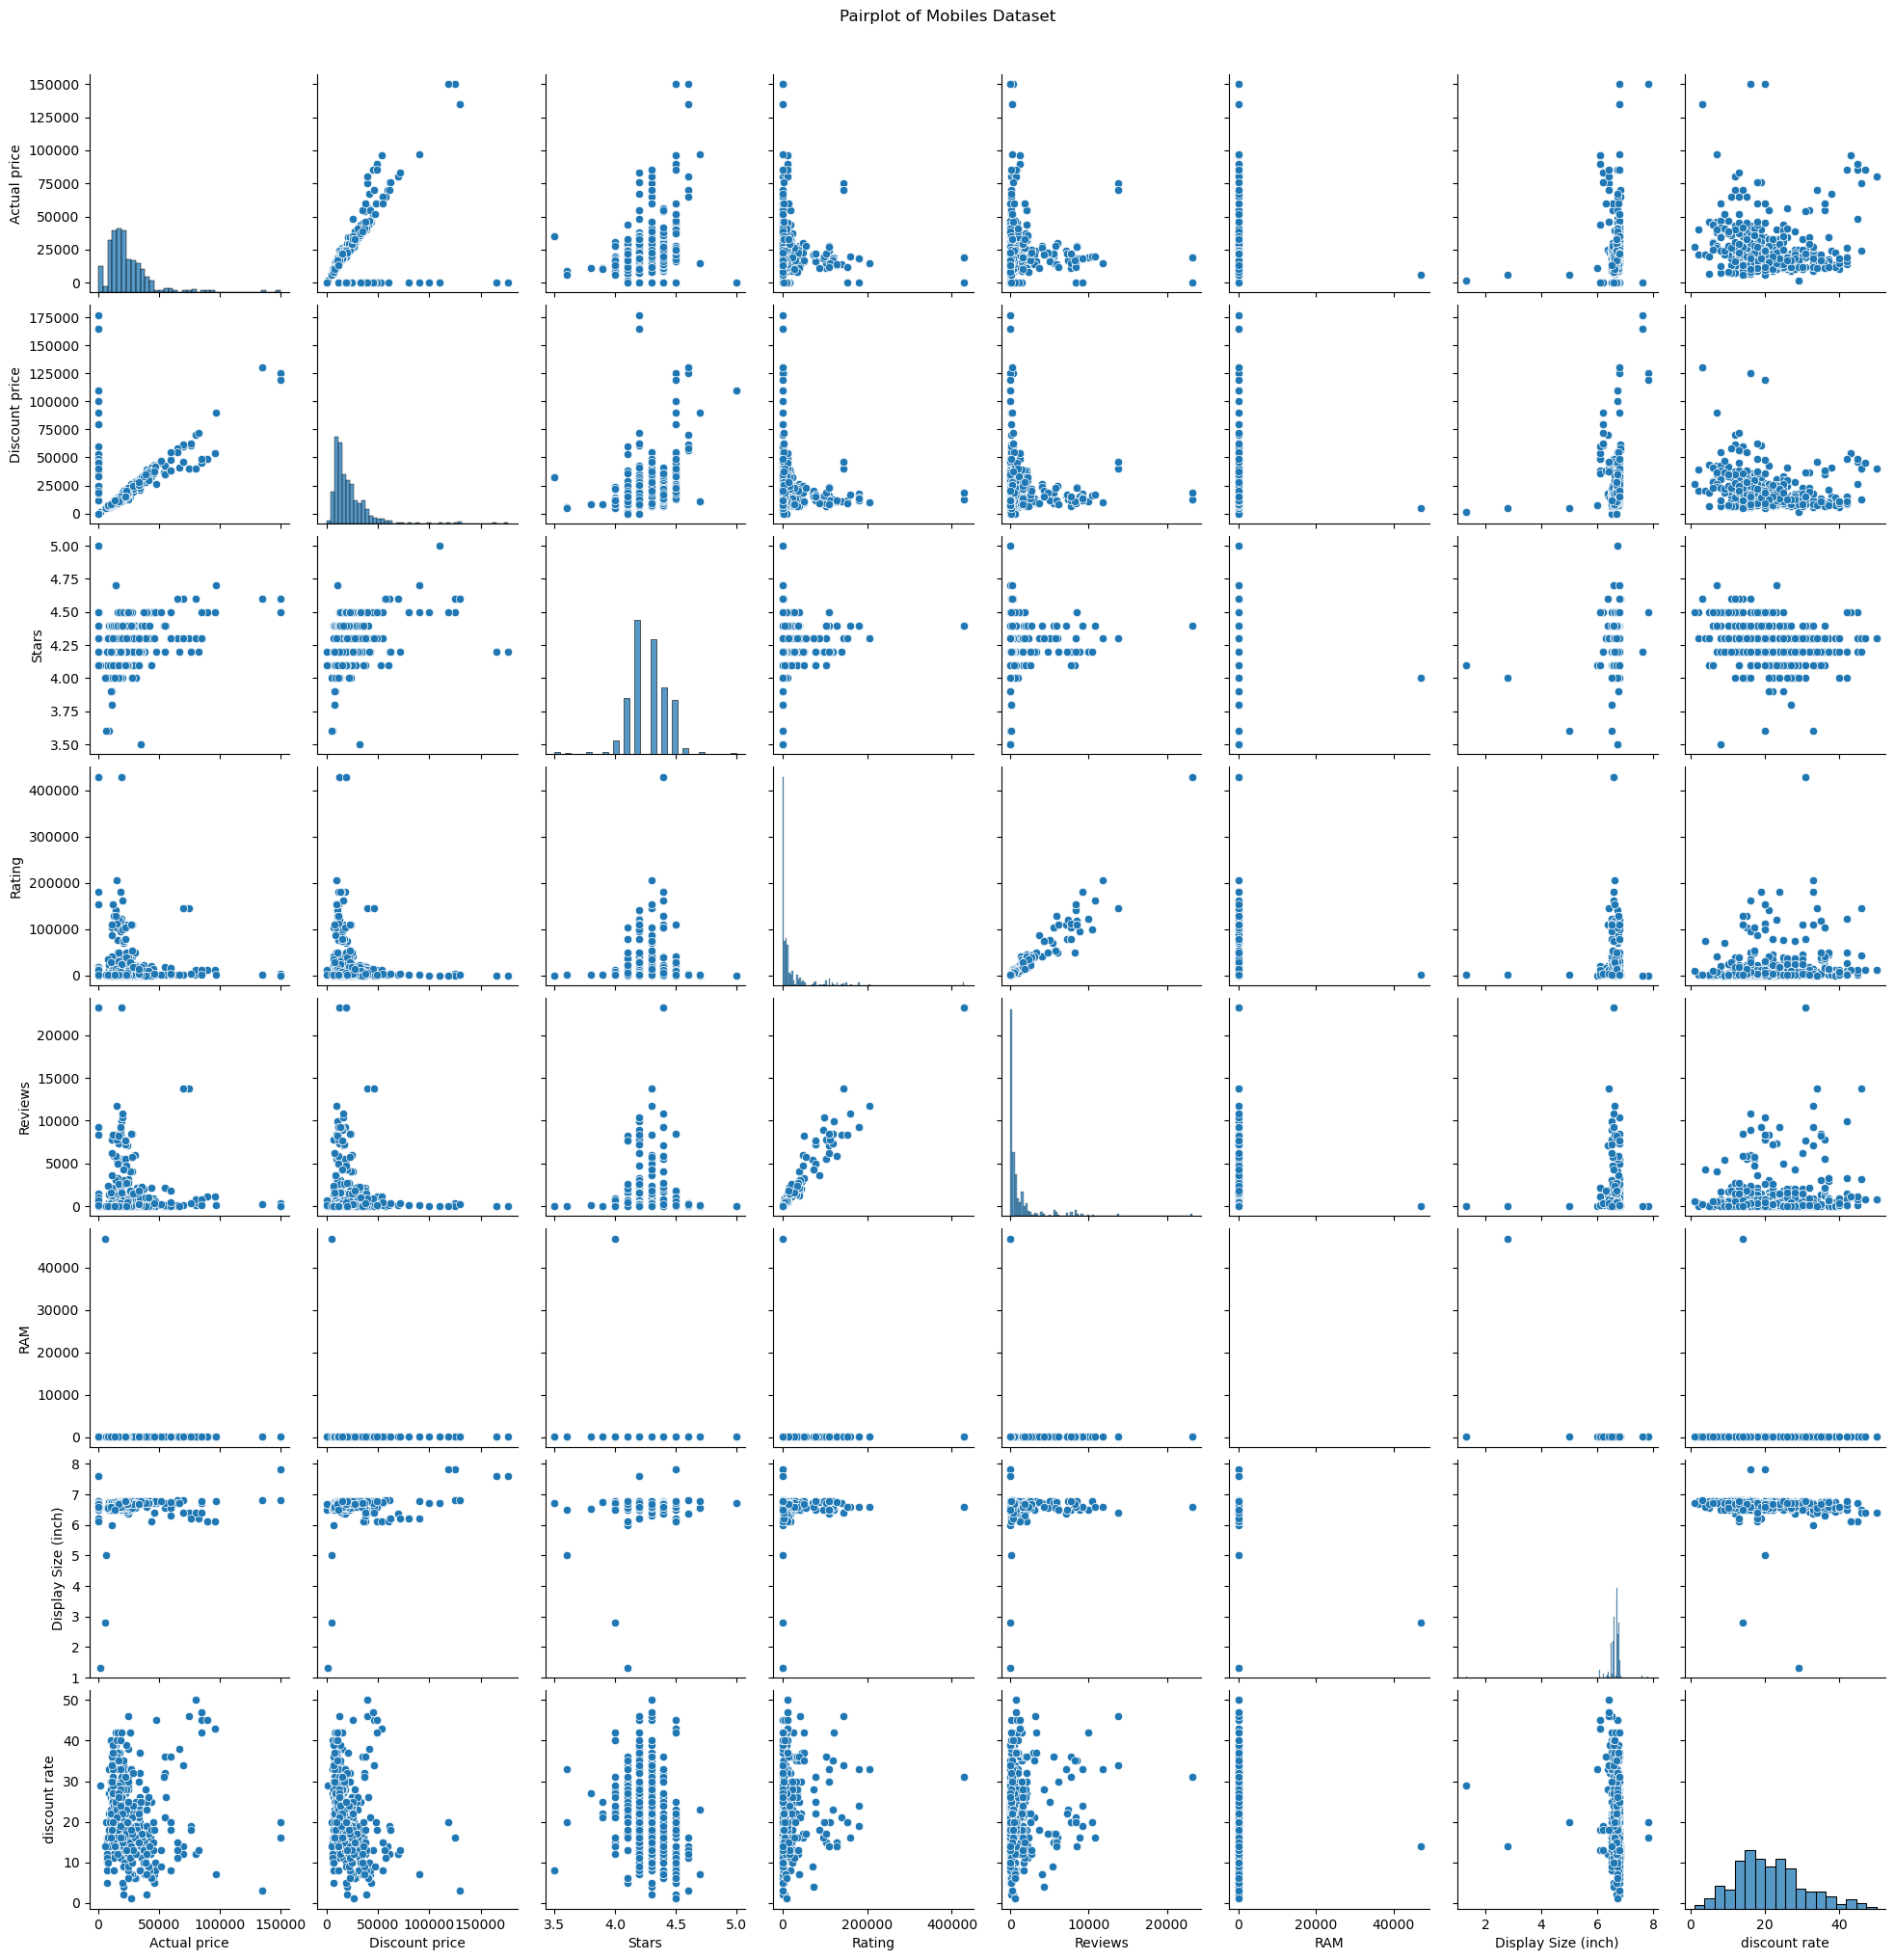

In [75]:
sns.pairplot(df)
plt.suptitle('Pairplot of Mobiles Dataset', y=1.02)
plt.show()

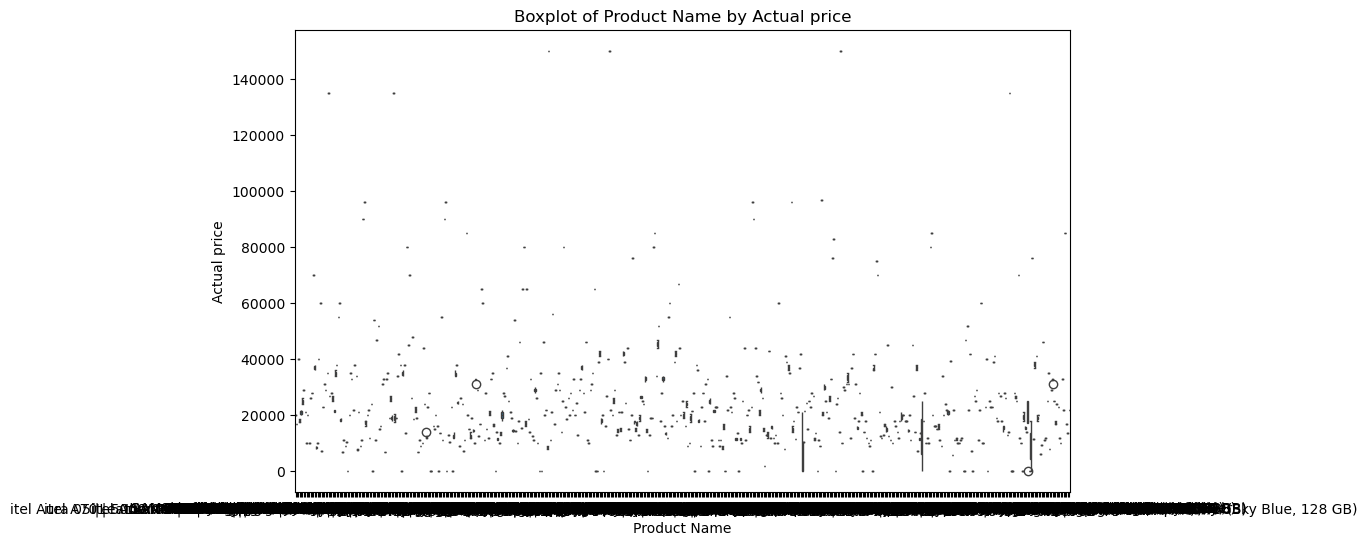

In [76]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Product Name', y='Actual price', data=df)
plt.title('Boxplot of Product Name by Actual price')
plt.show()

[709]
1


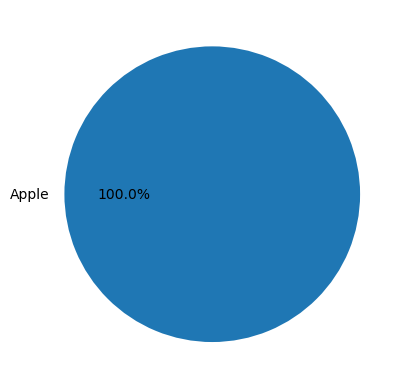

In [77]:
marka_apple = df['Product Name'].str.contains('Apple')
relative_apple = marka_apple.value_counts()
print(relative_apple.values)
print(len(relative_apple.values))
if len(relative_apple.values) == 2:
    labels = ['Apple', 'Others']
    explode = [0, 0.2]
else:
    labels = ['Apple'] + ['Others'] * (len(relative_apple.values) - 1)
    explode = [0] + [0.2] * (len(relative_apple.values) - 1)

plt.pie(relative_apple.values, labels=labels, autopct="%1.1f%%", explode=explode)
plt.show()


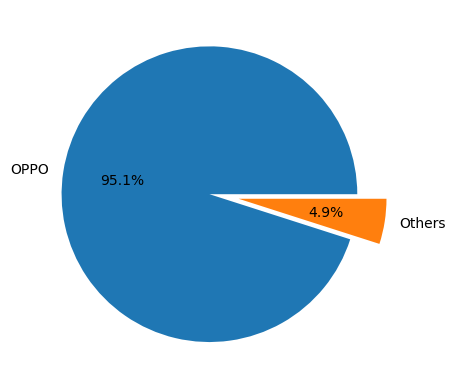

In [78]:
marka_OPPO = df['Product Name'].str.contains('OPPO')
relative_OPPO = marka_OPPO.value_counts()

plt.pie(relative_OPPO.values, labels=['OPPO', 'Others'], autopct="%1.1f%%", explode=[0,0.2])
plt.show()

C:\Users\Bharti Gangwar\AppData\Local\Temp\ipykernel_20304\1705055304.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(x="discount rate",data=df,palette="bright")


<Figure size 1000x500 with 0 Axes>

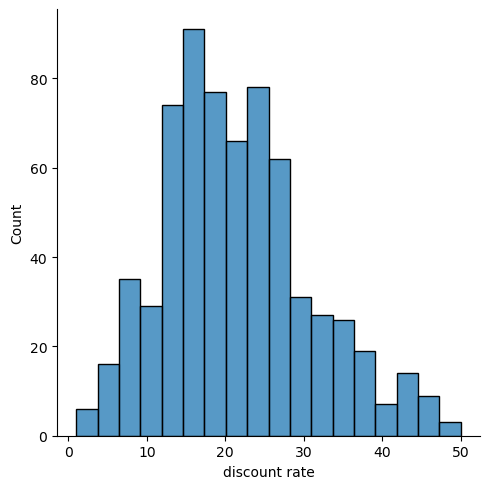

21.51044776119403


In [79]:
plt.figure(figsize=(10,5))
sns.displot(x="discount rate",data=df,palette="bright")
plt.yticks(rotation=0)
plt.show()
print(df["discount rate"].mean())

In [80]:
df.Camera.unique()


array(['50MP ', '50MP + 2MP', '64MP + 8MP', '50MP + 8MP', '8MP | 16MP  ',
       '16MP ', '50MP | 32MP  ', '64MP ', nan, '13MP ', '50MP + 12MP',
       '200MP + 50MP', '8MP | 20MP  ', '50MP + 50MP', '3MP | 2MP  ',
       '32MP ', '64MP + 2MP', '108MP ', '8MP + 2MP', '08MP | 16MP  ',
       '50MP + 10MP', '08MP | 5MP  ', '8MP ', '13MP + 2MP', '200MP ',
       '8MP | 5MP  ', '13MP | 13MP  ', '2MP + 2MP', '2MP | 16MP  ',
       '50MP + 48MP', '50MP + 13MP', '50MP + 5MP', '64MP + 13MP',
       '108MP + 2MP', '200MP + 10MP', '48MP + 8MP', '32MP + 2MP', '48MP ',
       '2MP | 8MP  ', '3MP ', '08MP | 8MP  ', '108MP + 5MP',
       '12MP + 12MP', '13MP + 13MP', '108MP + 8MP', '50MP + 64MP',
       '5MP + 0MP', '8MP | 8MP  ', '48MP + 5MP'], dtype=object)

C:\Users\Bharti Gangwar\AppData\Local\Temp\ipykernel_20304\3925541793.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="discount rate",data=df,palette="bright",order = top_10)


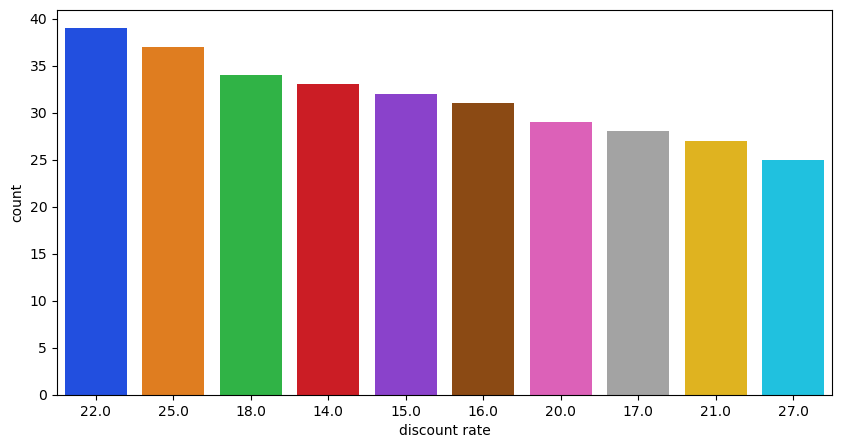

21.51044776119403


In [81]:
plt.figure(figsize=(10,5))
top_10 = df["discount rate"].value_counts().head(10).index
sns.countplot(x="discount rate",data=df,palette="bright",order = top_10)
plt.yticks(rotation=0)
plt.show()
print(df["discount rate"].mean())

C:\Users\Bharti Gangwar\AppData\Local\Temp\ipykernel_20304\2467291230.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="RAM",data=df,palette="bright")


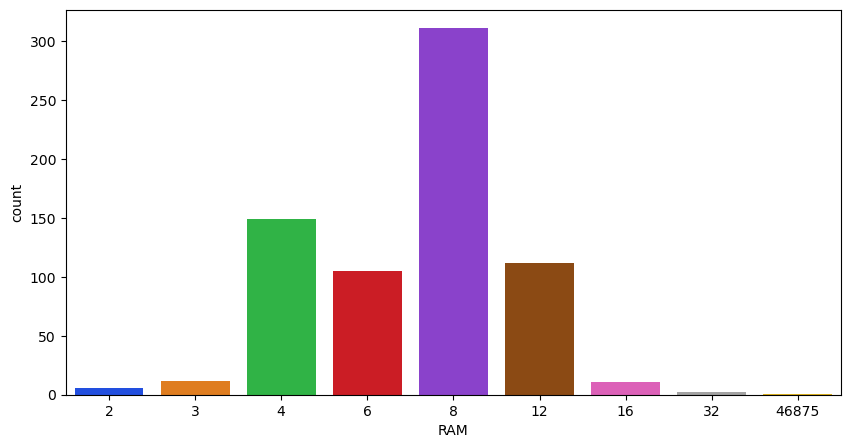

In [82]:
plt.figure(figsize=(10,5))
sns.countplot(x="RAM",data=df,palette="bright")
plt.yticks(rotation=0)
plt.show()

## Correlation Heatmap 

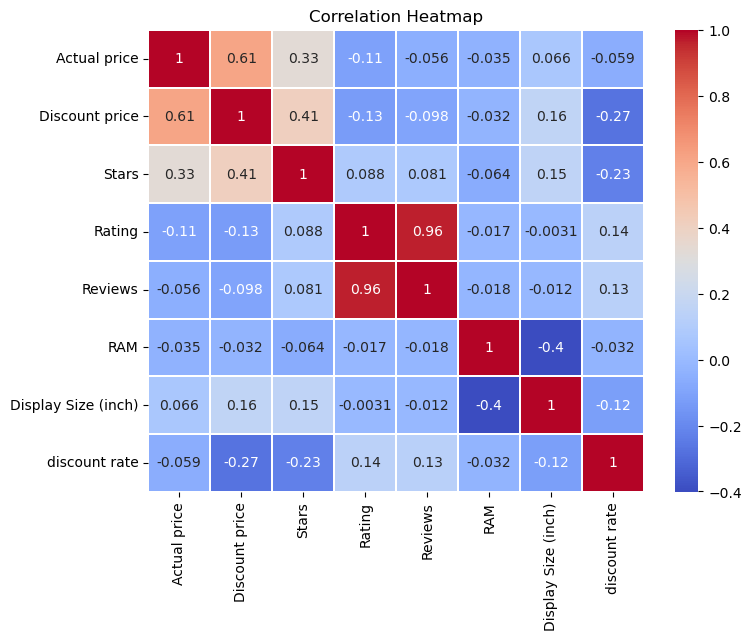

In [84]:

numeric_df = df.select_dtypes(include=[float, int])
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=.1)
plt.title('Correlation Heatmap')
plt.show()

<Axes: >

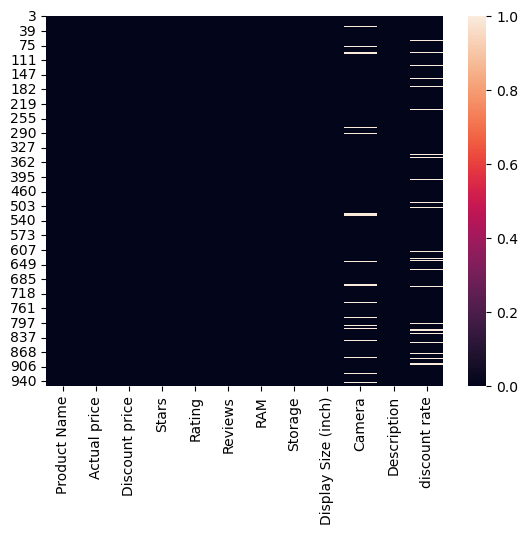

In [85]:
sns.heatmap(df.isnull())

Creat Model

In [87]:
df

,Product Name,Actual price,Discount price,Stars,Rating,Reviews,RAM,Storage,Display Size (inch),Camera,Description,discount rate
3,"OnePlus N20 SE (JADE WAVE, 128 GB)",19999.0,11489.0,4.0,1005.0,41.0,4,128,6.56,50MP,4 GB RAM | 128 GB ROM16.66 cm (6.56 inch) Disp...,42.0
4,"OnePlus N20 SE (BLUE OASIS, 64 GB)",16999.0,12999.0,4.0,1005.0,41.0,4,64,6.56,50MP,4 GB RAM | 64 GB ROM16.66 cm (6.56 inch) Displ...,23.0
5,"OnePlus 12R (Cool Blue, 128 GB)",39999.0,38989.0,4.5,4278.0,292.0,8,128,6.78,50MP,8 GB RAM | 128 GB ROM17.22 cm (6.78 inch) Disp...,2.0
6,"SAMSUNG Galaxy F14 5G (GOAT Green, 128 GB)",17490.0,10990.0,4.2,45538.0,2989.0,4,128,6.60,50MP + 2MP,4 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,37.0
7,"CMF by Nothing Phone 1 (Blue, 128 GB)",19999.0,15999.0,4.4,8057.0,701.0,6,128,6.67,50MP + 2MP,6 GB RAM | 128 GB ROM | Expandable Upto 2 TB16...,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...
948,"Motorola G60 (Soft Silver, 128 GB)",21999.0,14999.0,4.1,78515.0,7700.0,6,128,6.78,108MP + 8MP,6 GB RAM | 128 GB ROM17.22 cm (6.78 inch) Full...,31.0
955,"vivo X70 Pro+ (Enigma Black, 256 GB)",84990.0,48999.0,4.5,563.0,116.0,12,256,6.78,50MP + 48MP,12 GB RAM | 256 GB ROM17.22 cm (6.78 inch) WQH...,42.0
957,"Micromax IN Note 1 (Green, 128 GB)",16999.0,10999.0,4.1,50166.0,8284.0,4,128,6.67,48MP + 5MP,4 GB RAM | 128 GB ROM | Expandable Upto 256 GB...,35.0
964,"SAMSUNG Galaxy A03s (Black, 32 GB)",13499.0,11499.0,4.0,462.0,36.0,3,32,6.50,13MP + 2MP,3 GB RAM | 32 GB ROM | Expandable Upto 1 TB16....,14.0


In [88]:
y = df["Actual price"]
x = df.drop(columns=["Product Name","Description","Camera","discount rate","Actual price","Discount price"])

In [89]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.80,random_state=10)



In [90]:
accuracies=[]

In [91]:
def all (model):
    model.fit(x_train,y_train)
    model.score(x_test,y_test)
    pre=model.predict(y)
    accuracy = accuracy_score(pre,x)
    print('accuracy si :' ,accuracy)
    accuracies.append(accuracy)


     

In [92]:
lr = RandomForestClassifier()
model = lr.fit(x_train,y_train)





In [93]:
model.score(x_test,y_test)



0.7676056338028169

In [94]:
df= model.predict([[3,1005,41,4,64,6.50]])
df

C:\Users\Bharti Gangwar\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([16999.])